In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML
display(HTML("<h2>Data Loading and Preparation</h2>"))
display(HTML("<p>Loading the dataset and converting the 'Date' column to datetime format for time series analysis.</p>"))


In [2]:
def load_and_prepare_data(file_path):
    data = pd.read_csv(file_path, parse_dates=['Date'])
    return data

data = load_and_prepare_data('./Data/AAPL.csv')
display(HTML("<h2>Feature Engineering</h2>"))
display(HTML("<p>Generating technical indicators as new features to enhance the dataset for further analysis.</p>"))


In [3]:
def engineer_features(data):
    data['MA_10'] = data['Close'].rolling(window=10).mean()
    data['MA_20'] = data['Close'].rolling(window=20).mean()
    data['Returns'] = data['Close'].pct_change()
    data['EMA_10'] = data['Close'].ewm(span=10, adjust=False).mean()
    data['Volatility'] = data['Returns'].rolling(window=10).std()
    return data.dropna().reset_index(drop=True)

data = engineer_features(data)
display(HTML("<h2>Exploratory Data Analysis (EDA)</h2>"))
display(HTML("<p>Visualizing stock prices with moving averages to identify trends and using a heatmap to explore feature correlations.</p>"))


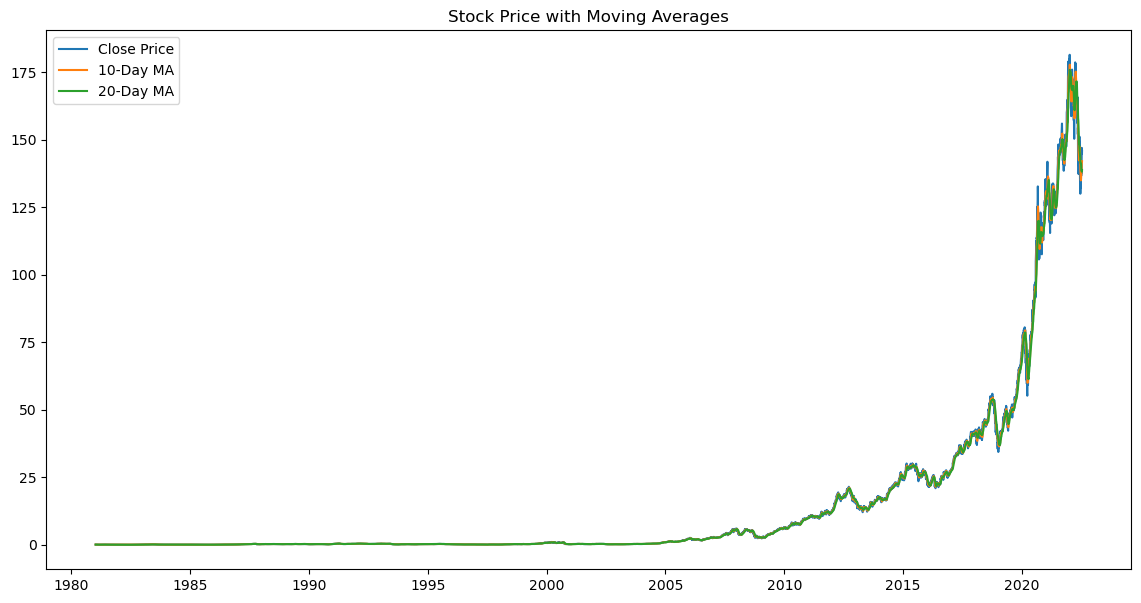

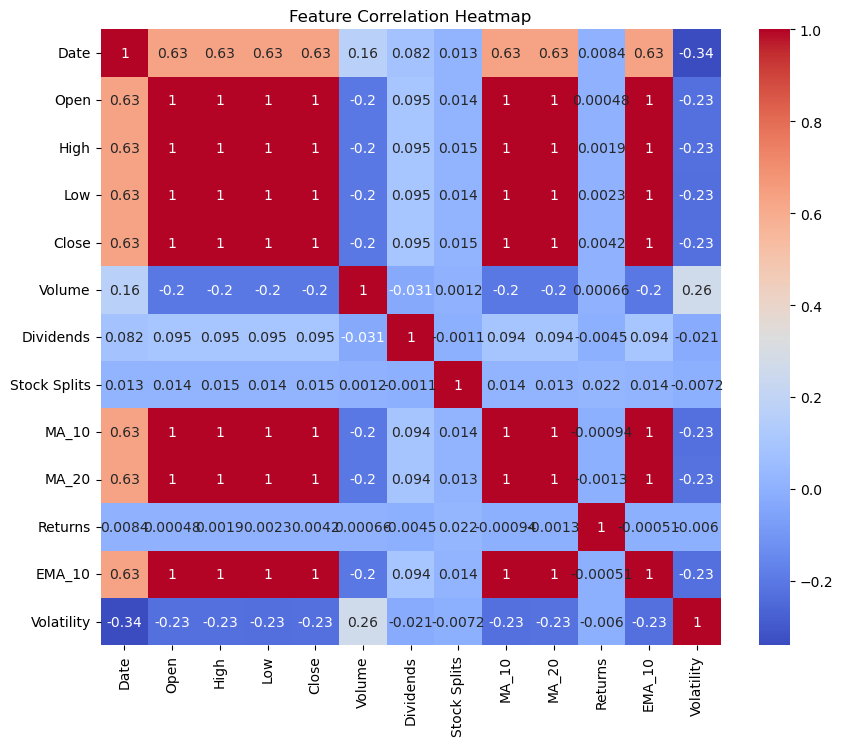

In [4]:
def plot_eda(data):
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.plot(data['Date'], data['MA_10'], label='10-Day MA')
    plt.plot(data['Date'], data['MA_20'], label='20-Day MA')
    plt.title('Stock Price with Moving Averages')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title('Feature Correlation Heatmap')
    plt.show()

plot_eda(data)
display(HTML("<h2>Data Preprocessing</h2>"))
display(HTML("<p>Scaling features and splitting the dataset into training and testing sets to prepare for model training.</p>"))


In [5]:
def preprocess_data(data):
    features = ['MA_10', 'MA_20', 'Returns', 'EMA_10', 'Volatility']
    X = data[features]
    y = data['Close']
    X_scaled = StandardScaler().fit_transform(X)
    return train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = preprocess_data(data)
display(HTML("<h2>Model Training and Evaluation</h2>"))
display(HTML("<p>Training a K-Nearest Neighbors (KNN) model and evaluating its performance on the test data.</p>"))


Best Parameters: {'n_neighbors': 6, 'weights': 'distance'}
Best Score: 0.9986
Mean Squared Error: 1.2415584822069377
R² Score: 0.9987


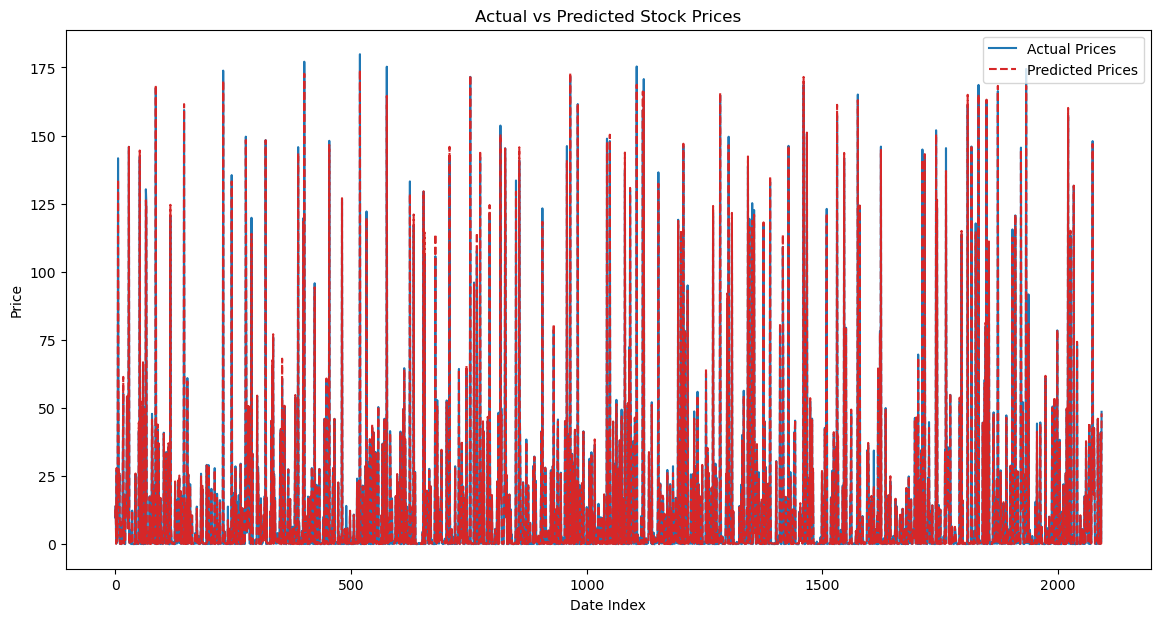

In [6]:
def train_and_evaluate_model(X_train, y_train, X_test, y_test):
    param_grid = {'n_neighbors': np.arange(1, 25), 'weights': ['uniform', 'distance']}
    knn_cv = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5).fit(X_train, y_train)
    
    predictions = knn_cv.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    print(f"Best Parameters: {knn_cv.best_params_}")
    print(f"Best Score: {knn_cv.best_score_:.4f}")
    print(f"Mean Squared Error: {mse}")
    print(f"R² Score: {r2:.4f}")
    
    plt.figure(figsize=(14, 7))
    plt.plot(y_test.reset_index(drop=True), label='Actual Prices', color='tab:blue')
    plt.plot(predictions, label='Predicted Prices', linestyle='--', color='tab:red')
    plt.title('Actual vs Predicted Stock Prices')
    plt.xlabel('Date Index')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

train_and_evaluate_model(X_train, y_train, X_test, y_test)
